In [453]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

def compute_scales(W_):
    W = normalize(W_)
    gc = W.shape[1]
    scales = np.zeros(gc)
    for i in range(gc):
        f = (W[:,i] > 0.5).astype(float)
        df = f[1:] - f[:-1]
        ind = np.where(df == -1.)[0]
        ind = ind.astype(float)
        if len(ind) > 1:
            scales[i] = np.mean(ind[1:] - ind[:-1])
        else:
            scales[i] = 0

    return scales

def normalize(W):
    W_ = W - np.amin(W)
    W_ = W_/np.amax(W_, axis=0, keepdims=True)
    return W_



In [454]:
filename = "Pretraining_trace.pkl"
with open(filename, 'rb') as f:
    data_ = pickle.load(f)
    
data = data_[:,100:500]
print(data.shape)

(100000, 400)


(100, 400)


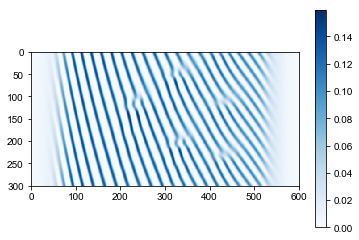

In [455]:
# start = 25000
start = 41000
end = start + 300

W = data_[start:end,:] 
plt.imshow(W, cmap="Blues")

plt.colorbar()

# for _ in range(60):
    
#     start = np.random.choice(100000-1000)
#     end = start + 300

#     W = data_[start:end,:] 
#     plt.title("{} : {}".format(start, end))
#     plt.yticks(np.arange(301, step=300//4), np.arange(start, end+1, step=300//4))
#     plt.imshow(W)
#     plt.show()

scales = []
for i in np.arange(0,len(data),step=1000):
    start = int(i)
    end = start + 200
    W = data[start:end,:]
    scales.append(compute_scales(W))

scales = np.array(scales) 
print(scales.shape)

(400,)
(400,) (400,) (391,)


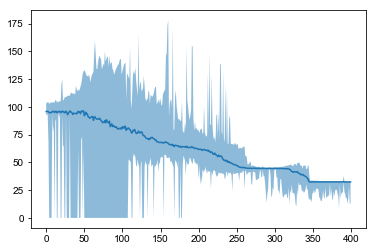

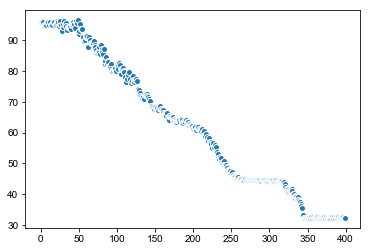

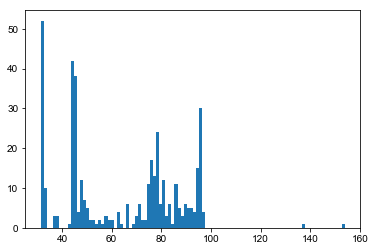

In [456]:
mu  = np.mean(scales, axis=0)
std = np.std(scales - mu, axis=0)

x = np.arange(400)
print(mu.shape)
# plt.plot(x,std)
# plt.fill_between(x, mu - std, mu + std, alpha=0.5)
plt.fill_between(x, np.amin(scales, axis=0),np.amax(scales, axis=0), alpha=0.5)
plt.plot(mu)
ok = scales >= 1.
print(ok[0].shape, x.shape, x[ok[0]].shape )
plt.show()

plt.scatter(x,mu, edgecolor="white")
# plt.scatter(x[ok[0]], scales[0,ok[0]], edgecolor="white")
# plt.plot(x[ok[0]], scales[0,ok[0]], marker='o')
plt.show()

# plt.plot(scales[2])
# plt.hist(scales[0,ok[0]], bins=100);
# plt.hist(scales[1,ok[1]], bins=100);
plt.hist(scales[2,ok[2]], bins=100);
plt.show()
# # print(scales.shape)
# # print(np.concatenate(scales).shape)
# combined_scales = np.concatenate(scales)
# combined_scales = combined_scales[combined_scales>=0.]
# # plt.hist(combined_scales, bins=100);

In [457]:
sub = np.arange(400,step=10)
# # x_ = np.arange(400)
# x_ = np.zeros(400)
# x_[sub] = 1.
# x_ = x_.astype(bool)

plt.ylabel("Scale")
plt.xlabel("Cell")



# print(sub)
for _ in range(50):
    i = np.random.choice(100)
#     plt.plot(x[ok[i]],scales[i,ok[i]], color="silver", alpha=.1, marker="s", linestyle="none")

    plt.plot(x[ok[i] * x_], 
             scales[i, ok[i]*x_], color="silver", linewidth=2., alpha=1.)

i = np.random.choice(100)
#     plt.plot(x[ok[i]],scales[i,ok[i]], color="silver", alpha=.1, marker="s", linestyle="none")

# plt.plot(x[ok[i] * x_], 
             scales[i, ok[i]*x_], color="silver", alpha=1., label="Example snapshots")



sub = np.arange(400,step=20)
# plt.plot(x[sub],scales[4, sub], color="black", linestyle="--", marker="o", markerfacecolor="white", label="Example snapshot")
# plt.plot(x[sub], mu[sub], color="black", marker="o", linestyle="-", linewidth=2,  markerfacecolor="white", label="Mean (over time)")
plt.errorbar(x[sub], mu[sub], yerr=std[sub], color="C0", 
#              marker="o", 
             fmt='--o',
             capsize=3 ,
             linestyle="-", linewidth=1,  markerfacecolor="white", label="Mean (over time)")


# plt.plot(x[0], mu[0], color="black", marker="|")
# plt.plot(x[-1], mu[-1], color="black", marker="d")
plt.legend()
plt.show()

i = 4

plt.hist(mu, bins=np.arange(111, step=1), color="black", orientation='horizontal');
plt.show()
# plt.plot(scales[i, sub ], color="black", linestyle="-", marker="o", markerfacecolor="white", label="Example snapshot")

IndentationError: unexpected indent (<ipython-input-457-2c27c892917e>, line 24)

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

/Users/mklukas/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


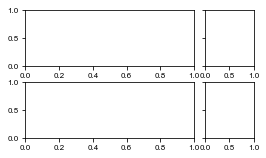

In [458]:
plt.rc("font",**{"family": "sans-serif",
                   "sans-serif": ["Arial"],
                   "size": 8})

# fig= plt.figure(figsize=(4.,2.), tight_layout = {"pad": 0})

sub = np.arange(400,step=20)

f, (ax1, ax2) = plt.subplots(2, 2, 
                             sharey=True,
                             figsize=(3.5,2.),
                             gridspec_kw = {'width_ratios':[3.5, 1]},
                            tight_layout = {"pad": 0})


ax1.set_ylabel("Scale")
ax1.set_xlabel("Cell Position in CAN")
ax1.errorbar(x[sub], mu[sub], yerr=std[sub], color="C0", 
#              marker="o", 
             fmt='--o',
             capsize=3 ,
             markersize=4,
             linestyle="none", linewidth=1,  
             markerfacecolor="white", 
#              markeredgecolor="white",
             label="Mean over time")


ax2.hist(mu, bins=40, color="C0", orientation='horizontal');

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)

ax1.legend()
plt.savefig("pre_training_scales.pdf")

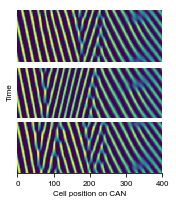

In [459]:
plt.rc("font",**{"family": "sans-serif",
                   "sans-serif": ["Arial"],
                   "size": 8})

fig, ax = plt.subplots(1, 1, figsize=(4.,3.))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.xlabel("Cell position on CAN")
plt.ylabel("Time")

wndw = 150
W = np.concatenate( [
        data_[13658:13658+wndw],
    data_[66237:66237+wndw],
    data_[51998:51998+wndw],
], axis=0)
ax.imshow(W[:,100:500], cmap="viridis", vmax=np.amax(W) - 0.03)
ax.axhline(wndw-1, color="white", linewidth=6)
ax.axhline(2*(wndw-1)+5, color="white", linewidth=4)

plt.savefig("pre_training_traces.pdf")

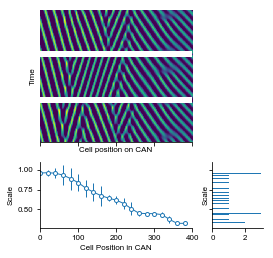

In [462]:
plt.rc("font",**{"family": "sans-serif",
                   "sans-serif": ["Arial"],
                   "size": 8})

# fig= plt.figure(figsize=(4.,2.), tight_layout = {"pad": 0})

sub = np.arange(400,step=20)

# f, ( (ax0, ax_) ,(ax1, ax2)) = plt.subplots(2, 2, 
#                             sharex='col', sharey='row',
#                              figsize=(4.,5.),
#                              gridspec_kw = {'width_ratios':[3., 1],
#                                            'height_ratios':[2., 2]},
# #                                          tight_layout = {"pad": 0}
#                             )

f, ( (ax0, ax_) ,(ax1, ax2)) = plt.subplots(2, 2, 
                            sharex='col', sharey='row',
                             figsize=(4.,4.),
                             gridspec_kw = {'width_ratios':[3., 1],
                                           'height_ratios':[2., 1]},
#                                          tight_layout = {"pad": 0}
                            )


# mu  = np.mean(scales[np.where(scales>0), axis=0)
                     
mu = np.array(  [ np.mean(scales[ np.where(scales[:,i]>0) ,i ]/100.) for i in sub])
# std = np.std(scales , axis=0)
std = np.array(  [ np.std(scales[ np.where(scales[:,i]>0) ,i ]/100.) for i in sub])
# plt.plot(mu)

ax_.axis('off')
ax1.set_ylabel("Scale")
ax1.set_xlabel("Cell Position in CAN")
ax1.errorbar(sub, mu, yerr=std, color="C0", 
#              marker="o", 
             fmt='--o',
#              capsize=3 ,
             markersize=4,
             linestyle="-", linewidth=1,  
             markerfacecolor="white", 
#              markeredgecolor="white",
             label="Mean over time")



ax2.set_ylabel("Scale")
ax2.hist(mu, bins=50, color="C0", orientation='horizontal');

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)

# ax1.legend()



ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_yticks([])
ax0.set_xlabel("Cell position on CAN")
ax0.set_ylabel("Time")

wndw = 150
W = np.concatenate( [
        data_[13658:13658+wndw],
    data_[66237:66237+wndw],
    data_[51998:51998+wndw],
], axis=0)
ax0.imshow(W[:,100:500], cmap="viridis")
ax0.axhline(wndw-1, color="white", linewidth=6)
ax0.axhline(2*(wndw-1)+6, color="white", linewidth=6)

ax0.set_aspect('auto')

plt.savefig("pre_training_traces.pdf")
plt.savefig("pre_training_traces.png")


In [463]:
filename = "Trained_trace.pkl"
with open(filename, 'rb') as f:
    W = pickle.load(f)

    
# for _ in range(60):
    
#     start = np.random.choice(100000-1000)
#     end = start + 300

#     W_ = W[start:end,:] 
#     plt.title("{} : {}".format(start, end))
#     plt.yticks(np.arange(301, step=300//4), np.arange(start, end+1, step=300//4))
#     plt.imshow(W_)
#     plt.show()

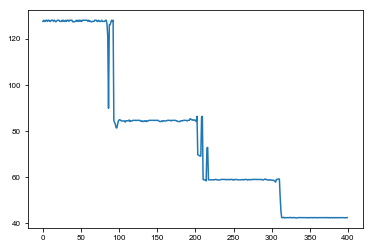

In [464]:
post_scales = []
for i in np.arange(0,len(data),step=1000):
    start = int(i)
    end = start + 400
    W_ = W[start:end,100:500]
    post_scales.append(compute_scales(W_))

post_scales = np.array(post_scales) 

plt.plot(post_scales[10])
mu  = np.mean(post_scales, axis=0)
std = np.std(post_scales - mu, axis=0)


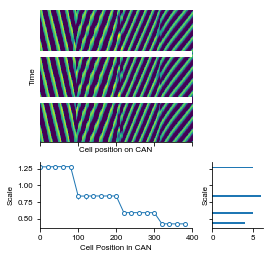

In [465]:
plt.rc("font",**{"family": "sans-serif",
                   "sans-serif": ["Arial"],
                   "size": 8})

# fig= plt.figure(figsize=(4.,2.), tight_layout = {"pad": 0})

sub = np.arange(400,step=20)

f, ( (ax0, ax_) ,(ax1, ax2)) = plt.subplots(2, 2, 
                            sharex='col', sharey='row',
                             figsize=(4.,4.),
                             gridspec_kw = {'width_ratios':[3., 1],
                                           'height_ratios':[2., 1]},
#                                          tight_layout = {"pad": 0}
                            )

ax_.axis('off')
ax_.axis('off')
ax1.set_ylabel("Scale")
ax1.set_xlabel("Cell Position in CAN")

c = "C0"

mu = np.array(  [ np.mean(post_scales[ np.where(post_scales[:,i]>0) ,i ]/100.) for i in sub])
# std = np.std(scales , axis=0)
std = np.array(  [ np.std(post_scales[ np.where(post_scales[:,i]>0) ,i ]/100.) for i in sub])
# plt.plot(mu)

ax1.errorbar(sub, mu, yerr=std, 
             color=c, 
#              marker="o", 
             fmt='--o',
#              capsize=3 ,
             markersize=4,
             linestyle="-", linewidth=1,  
             markerfacecolor="white", 
#              markeredgecolor="white",
             label="Mean over time")


ax2.set_ylabel("Scale")
ax2.hist(mu, bins=40, color=c, orientation='horizontal');

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)

# ax1.legend()



ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_yticks([])
ax0.set_xlabel("Cell position on CAN")
ax0.set_ylabel("Time")

# wndw = 250

W_ = np.concatenate([
    W[10020:10020+wndw],
    W[50011:50011+wndw],
    W[20001:20001+wndw]
], axis=0)
ax0.imshow(W_[:,100:500], cmap="viridis")
ax0.axhline(wndw-1, color="white", linewidth=6)
ax0.axhline(2*(wndw-1)+6, color="white", linewidth=6)

ax0.set_aspect('auto')

plt.savefig("post_training_traces.pdf")
# plt.savefig("post_training_traces.png")


In [427]:
corrs = np.corrcoef(W[-1000:,100:500], rowvar=False)

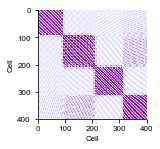

In [443]:
plt.rc("font",**{"family": "sans-serif",
                   "sans-serif": ["Arial"],
                   "size": 8})

# fig= plt.figure(figsize=(4.,2.), tight_layout = {"pad": 0})

sub = np.arange(400,step=20)

# f, ( (ax0, ax_) ,(ax1, ax2)) = plt.subplots(2, 2, 
#                             sharex='col', sharey='row',
#                              figsize=(4.,4.),
#                              gridspec_kw = {'width_ratios':[3., 1],
#                                            'height_ratios':[2., 1]},
# #                                          tight_layout = {"pad": 0}
#                             )
f, ax = plt.subplots(1, 1, figsize=(2.,2.))
#     tight_layout = {"pad": 0}

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.set_xlabel("Cell")
ax.set_ylabel("Cell")

ax.set_xticks([0,100,200,300,400])
ax.set_yticks([0,100,200,300,400])
ax.imshow(corrs, cmap="bwr")

plt.savefig("corr.pdf")